<h1 align="center">  ARTIFICIAL NEURAL NETWORK</h1>  </br>

    In this case we will implement a 2-layer neural network.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Initialization function

In [71]:
# n0 : le nombre d'entrées du réseau
# n1 : le nombre de neurones dans la couche 1
# n2 : le nombre de neurones dans la couche 2

def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    parametres = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2    
    }
    return(parametres)

### Model function: forward propagation

    You have to be careful with the exp function. If we give it a very high value there will be a risk of overflow.

    Hence the need for data normalization. This step is mandatory when using the algorithm gradient descent

In [70]:
def forward_propagation(X, parametres):
    W1 = parametres["W1"]
    b1 = parametres["b1"]
    W2 = parametres["W2"]
    b2 = parametres["b2"]
    
    Z1 = W1.dot(X) + b1
    A1 = 1/(1 + np.exp(-Z1))        

    Z2 = W2.dot(A1) + b2
    A2 = 1/(1 + np.exp(-Z2))        
    
    activation = {
        "A1" : A1,
        "A2" : A2    }
    return activation

### Cost function

    It will be calculated by a predefined scikit learn function

### Function of gradients: back propagation

In [81]:
def back_propagation(X, y, activation, parametres):
    
    A1 = activation['A1']
    A2 = activation['A2']
    W2 = parametres['W2']
    
    m  = y.shape[1]
    
    dZ2 = A2 - y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1 , keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1-A1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1 , keepdims=True)
    
    gradients = {
        "dW1" : dW1,
        "db1" : db1,
        "dW2" : dW2,
        "db2" : db2
    }
    
    return(gradients)

### Update function

In [82]:
def update (gradients, parametres , learning_rate) : 
    
    W1 = parametres["W1"] 
    b1 = parametres["b1"] 
    W2 = parametres["W2"] 
    b2 = parametres["b2"] 
    
    dW1 = gradients["dW1"] 
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    
    parametres = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2    
    }
    return(parametres)

### Final assembly

In [61]:
def predict (X, parametres):
    activation = forward_propagation(X, parametres)
    A2 = activation["A2"]
    return A2 >= 0.5      ### Si A2>0.5 alors elle reçoit 1 c'est à dire la plante est toxique sinon 0

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from tqdm import tqdm # affiche une bar de progression lors de l'éxécution

In [86]:
def neural_network(X_train, y_train,n1, learning_rate=0.1, n_iter=100):
    
    # n1 : Le nombre de neurones qu'on désire avoir dans la première couche => à nous de le définir
    n0 = X_train.shape[0]  ## X est transposée par défaut donc le nombre de variables = nombre de lignes
    n2 = y_train.shape[0]  ## pareil pour y 
    
    parametres = initialisation(n0, n1, n2)
    
    train_Loss = []
    train_acc = []

    for i in tqdm(range (n_iter)) : 

        activation = forward_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, activation, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        if (i % 10 == 0):

            train_Loss.append(log_loss(y_train, activation["A2"]))
            y_pred = predict(X_train, parametres)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
            
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(train_Loss, label='train loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()
    return(parametres)


## Application example :

In [64]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

dimensions de X : (2, 100)
dimensions de Y : (1, 100)


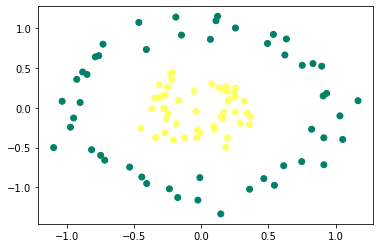

In [65]:
X, y = make_circles(n_samples= 100, noise=0.1, factor=0.3, random_state=0)
## On travaille toujours avec la tronsposé de X.
X = X.T
y = y.reshape((1,y.shape[0]))

print('dimensions de X :', X.shape)
print('dimensions de Y :', y.shape)

plt.scatter(X[0,:],X[1,:], c=y, cmap="summer")

100%|██████████| 1000/1000 [00:00<00:00, 4902.24it/s]


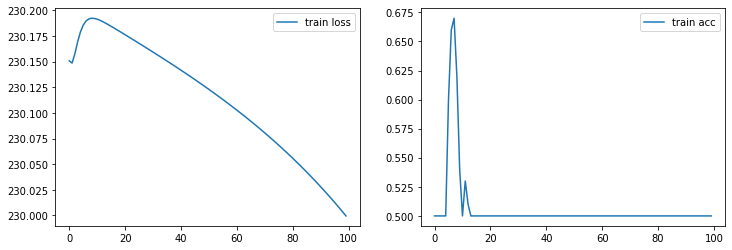

In [96]:
parametres = neural_network(X,y,n1=2, n_iter=1000, learning_rate = 0.1)

100%|██████████| 1000/1000 [00:00<00:00, 5494.49it/s]


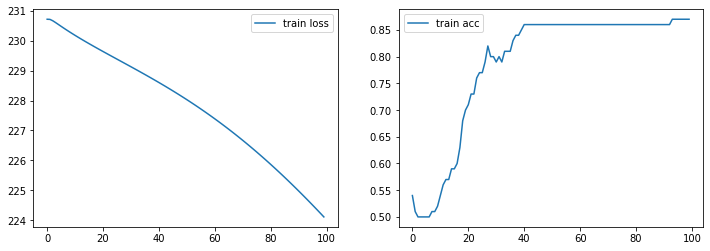

In [97]:
parametres = neural_network(X,y,n1=8, n_iter=1000, learning_rate = 0.1)

100%|██████████| 1000/1000 [00:00<00:00, 3861.26it/s]


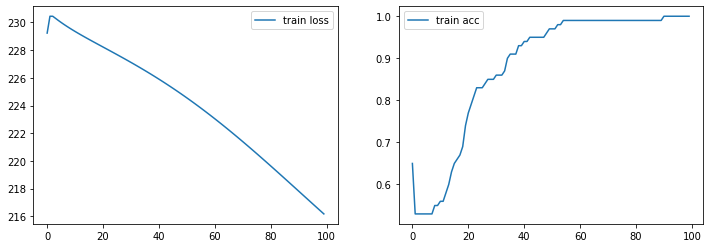

In [100]:
parametres = neural_network(X,y,n1=32, n_iter=1000, learning_rate = 0.1)

In [118]:
from utilities import * 

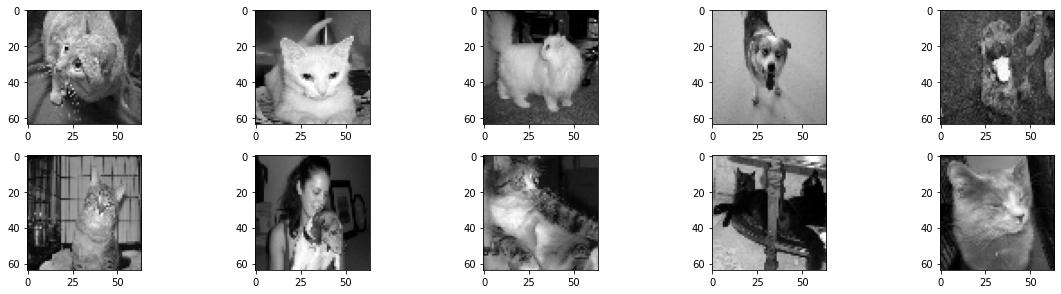

In [139]:
X_train, y_train, X_test, y_test = load_data()
plt.figure(figsize=(16,8))
for i in range(1,11) : 
    plt.subplot(4,5,i)
    plt.imshow(X_train[i], cmap='gray')
    plt.tight_layout()

plt.show()

In [134]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 64, 64)
(1000, 1)
(200, 64, 64)
(200, 1)


In [140]:
X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1])/ X_train.max()

X_test = X_test.T
X_test_reshape = X_test.reshape(-1, X_test.shape[-1])/ X_test.max()

y_train = y_train.T 
y_test = y_test.T

m_train = 300
m_test = 80

X_train_reshape = X_train_reshape[:,: m_train]
print(X_train_reshape.shape)

X_test_reshape = X_test_reshape[:,:m_test]
print(X_test_reshape.shape)

y_train = y_train[:,: m_train]
print(y_train.shape)


y_test = y_test[:,:m_test]
print(y_test.shape)


(4096, 300)
(4096, 80)
(1, 300)
(1, 80)


100%|██████████| 1000/1000 [00:31<00:00, 31.78it/s]


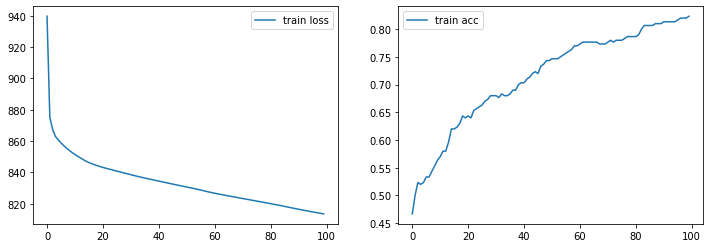

{'W1': array([[-0.42932139,  0.87814709,  0.34445836, ...,  0.31806502,
         -1.03662895,  1.05789917],
        [-0.0237985 ,  0.16642605,  1.24785428, ..., -0.27502067,
         -0.45015931, -0.69067851],
        [ 2.27955151,  0.90629882,  0.0150031 , ..., -0.48549497,
         -0.58418526,  0.27190996],
        ...,
        [-1.12530642, -0.09157506,  1.74634401, ..., -0.76828219,
         -0.27814736, -0.31302529],
        [ 0.85692735, -0.4849853 , -0.99785632, ...,  0.16576533,
          0.51483497,  0.19282003],
        [-0.72641667, -0.29844503, -1.12682043, ..., -0.01901821,
          1.94386798, -2.3619355 ]]),
 'b1': array([[ 1.10736698],
        [-1.34191539],
        [-0.36543764],
        [ 1.75836337],
        [-0.72783484],
        [ 0.20996935],
        [ 1.44401906],
        [ 0.65362979],
        [ 0.09538984],
        [-1.85501307],
        [-1.41269335],
        [-2.26866992],
        [-0.2659807 ],
        [-0.69023302],
        [ 0.01799106],
        [ 0.4056

In [141]:
neural_network(X_train_reshape,y_train,n1=32, n_iter=1000, learning_rate = 0.1)

100%|██████████| 1000/1000 [00:09<00:00, 100.07it/s]


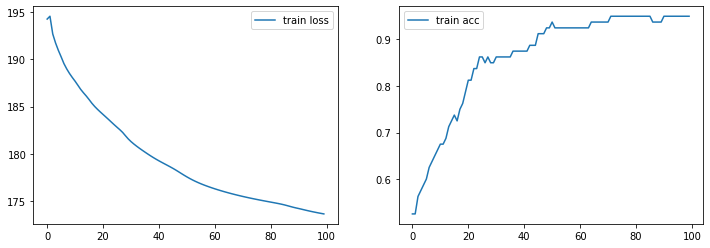

{'W1': array([[-0.38444183, -0.1540301 ,  0.03783181, ..., -0.73086958,
         -1.17516522, -0.67205383],
        [ 0.02194046, -0.97552233, -0.81452934, ...,  0.98236638,
         -1.15927489,  0.06124967],
        [ 0.00554948, -0.32216657, -0.08486564, ..., -1.47078077,
         -0.5472998 , -0.8953659 ],
        ...,
        [-1.22364945, -0.75903433, -0.9682235 , ..., -0.24149289,
         -0.47888661,  0.55685549],
        [ 1.5015319 ,  0.08206357, -0.44070081, ...,  0.5926803 ,
          0.247693  , -2.45319846],
        [ 0.84925312, -0.57244284,  1.25469142, ...,  0.27915083,
         -0.52076596, -0.73050067]]),
 'b1': array([[ 1.44030958],
        [-0.78972693],
        [ 0.60709337],
        [ 0.41766383],
        [-0.55092967],
        [ 0.20572546],
        [-1.66587342],
        [ 1.1116059 ],
        [ 0.1478687 ],
        [ 0.49538837],
        [-0.42460291],
        [ 1.15355378],
        [-1.29228361],
        [ 0.8510837 ],
        [-0.52801981],
        [-0.0632

In [142]:
neural_network(X_test_reshape,y_test,n1=32, n_iter=1000, learning_rate = 0.1)